In [1]:
import pandas as pd
from sklearn import tree

In [2]:
path = 'https://raw.githubusercontent.com/ovibaridar/Data_sets/main/game%20data.csv'

In [3]:
data = pd.read_csv(path)

In [11]:
data.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [12]:
data = data.drop('Days' , axis=1)

In [13]:
data.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [16]:
x = data.drop('Wear Jacket?' , axis=1)
y = data[['Wear Jacket?']]

In [17]:
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder

In [18]:
for col in x.columns:
    if is_numeric_dtype(x[col]):
        continue
    else:
        x[col] =LabelEncoder().fit_transform(x[col])

In [19]:
x.head()

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


In [20]:
data.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [42]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [43]:
dtc= DecisionTreeClassifier()

In [44]:
dtc.fit(x,y)

DecisionTreeClassifier()

In [45]:
dtc.predict([[1,0,0]])

array(['No'], dtype=object)

In [46]:
from matplotlib import pyplot as plt

[Text(0.6, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'Outlook <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'Routine <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

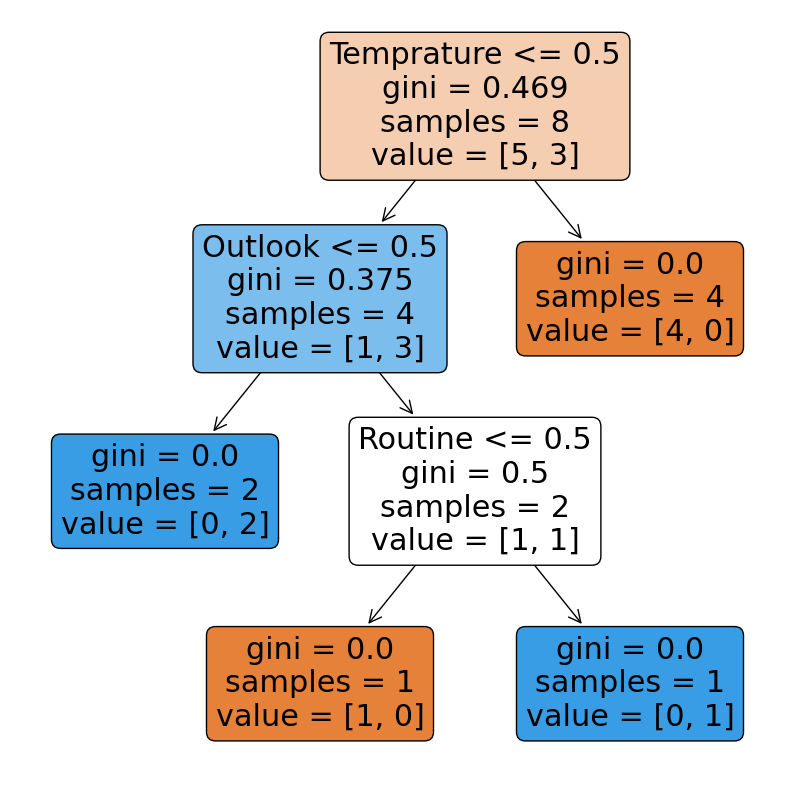

In [47]:
plt.figure(figsize=(10,10))
tree.plot_tree(dtc ,feature_names=x.columns , rounded=True, filled=True)